In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
import numpy as np

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
df = pd.read_excel('../data/Poblacion_01.xlsx',skiprows = range(0, 4))
df.rename(columns = {'Entidad federativa': 'state', 'Grupo quinquenal de edad': 'age_range'}, inplace=True)
df = df.iloc[0:32*21,:].copy()
df.head()

,state,age_range,Total
0,Estados Unidos Mexicanos,0 a 4 años,10047365.0
1,Estados Unidos Mexicanos,5 a 9 años,10764379.0
2,Estados Unidos Mexicanos,10 a 14 años,10943540.0
3,Estados Unidos Mexicanos,15 a 19 años,10806690.0
4,Estados Unidos Mexicanos,20 a 24 años,10422095.0


In [3]:
dfq=df.query("state == 'Aguascalientes'").copy()
rows, columns = dfq.shape

In [4]:
dfFinal=pd.DataFrame()
daf=df.query( "age_range == '0 a 4 años'").copy()
dfFinal['state']=daf['state']

for age in dfq['age_range']:
    dfFinal2=pd.DataFrame()
    query = "age_range == '{}'".format(age)
    df2=df.query(query).copy()
    dfFinal2['state']=df2['state']
    dfFinal2[age]=df2['Total']
    dfFinal = pd.merge(dfFinal,dfFinal2,on='state')
dfFinal.head()

,state,0 a 4 años,5 a 9 años,10 a 14 años,15 a 19 años,20 a 24 años,25 a 29 años,30 a 34 años,35 a 39 años,40 a 44 años,...,60 a 64 años,65 a 69 años,70 a 74 años,75 a 79 años,80 a 84 años,85 a 89 años,90 a 94 años,95 a 99 años,100 años y más,No especificado
0,Estados Unidos Mexicanos,10047365.0,10764379.0,10943540.0,10806690.0,10422095.0,9993001.0,9420827.0,9020276.0,8503586.0,...,4821062.0,3645077.0,2647340.0,1814582.0,1175364.0,659245.0,266806.0,95205.0,18295.0,273386.0
1,Aguascalientes,124430.0,131048.0,129717.0,131967.0,127020.0,118426.0,106825.0,99257.0,92378.0,...,48306.0,35823.0,25586.0,16581.0,10186.0,5576.0,2410.0,796.0,112.0,1508.0
2,Baja California,266301.0,299654.0,312348.0,315639.0,340359.0,328244.0,302389.0,292069.0,273611.0,...,134022.0,94704.0,65425.0,40874.0,25204.0,12451.0,4858.0,1512.0,252.0,8219.0
3,Baja California Sur,62455.0,66933.0,67665.0,65469.0,66743.0,68798.0,67779.0,64927.0,59389.0,...,27095.0,19274.0,12545.0,8166.0,4649.0,2556.0,936.0,332.0,55.0,3842.0
4,Campeche,78935.0,82015.0,80168.0,76140.0,75556.0,72798.0,72709.0,70275.0,64170.0,...,32778.0,25796.0,17559.0,11916.0,7536.0,4413.0,1768.0,701.0,149.0,4294.0


In [10]:
dfFinal['state'] = dfFinal['state'].str.upper()
dfFinal['state'] =dfFinal['state'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
dfFinal.head()

,state,0 a 4 años,5 a 9 años,10 a 14 años,15 a 19 años,20 a 24 años,25 a 29 años,30 a 34 años,35 a 39 años,40 a 44 años,...,60 a 64 años,65 a 69 años,70 a 74 años,75 a 79 años,80 a 84 años,85 a 89 años,90 a 94 años,95 a 99 años,100 años y más,No especificado
0,ESTADOS UNIDOS MEXICANOS,10047365.0,10764379.0,10943540.0,10806690.0,10422095.0,9993001.0,9420827.0,9020276.0,8503586.0,...,4821062.0,3645077.0,2647340.0,1814582.0,1175364.0,659245.0,266806.0,95205.0,18295.0,273386.0
1,AGUASCALIENTES,124430.0,131048.0,129717.0,131967.0,127020.0,118426.0,106825.0,99257.0,92378.0,...,48306.0,35823.0,25586.0,16581.0,10186.0,5576.0,2410.0,796.0,112.0,1508.0
2,BAJA CALIFORNIA,266301.0,299654.0,312348.0,315639.0,340359.0,328244.0,302389.0,292069.0,273611.0,...,134022.0,94704.0,65425.0,40874.0,25204.0,12451.0,4858.0,1512.0,252.0,8219.0
3,BAJA CALIFORNIA SUR,62455.0,66933.0,67665.0,65469.0,66743.0,68798.0,67779.0,64927.0,59389.0,...,27095.0,19274.0,12545.0,8166.0,4649.0,2556.0,936.0,332.0,55.0,3842.0
4,CAMPECHE,78935.0,82015.0,80168.0,76140.0,75556.0,72798.0,72709.0,70275.0,64170.0,...,32778.0,25796.0,17559.0,11916.0,7536.0,4413.0,1768.0,701.0,149.0,4294.0


In [11]:
dfTest = dfFinal.copy()
dfTest = dfTest.query("state == 'ESTADOS UNIDOS MEXICANOS'").copy()
dfTest.head()

,state,0 a 4 años,5 a 9 años,10 a 14 años,15 a 19 años,20 a 24 años,25 a 29 años,30 a 34 años,35 a 39 años,40 a 44 años,...,60 a 64 años,65 a 69 años,70 a 74 años,75 a 79 años,80 a 84 años,85 a 89 años,90 a 94 años,95 a 99 años,100 años y más,No especificado
0,ESTADOS UNIDOS MEXICANOS,10047365.0,10764379.0,10943540.0,10806690.0,10422095.0,9993001.0,9420827.0,9020276.0,8503586.0,...,4821062.0,3645077.0,2647340.0,1814582.0,1175364.0,659245.0,266806.0,95205.0,18295.0,273386.0


In [12]:
dfStates = pd.read_csv('../data/states_institution.csv')
dfStates = dfStates[['cve_ent','state_inegi']]
dfStates.rename(columns = {'state_inegi':'state'},inplace=True)

In [13]:
dfFinal = pd.merge(dfStates,dfFinal,on='state')
dfFinal.head()

,cve_ent,state,0 a 4 años,5 a 9 años,10 a 14 años,15 a 19 años,20 a 24 años,25 a 29 años,30 a 34 años,35 a 39 años,...,60 a 64 años,65 a 69 años,70 a 74 años,75 a 79 años,80 a 84 años,85 a 89 años,90 a 94 años,95 a 99 años,100 años y más,No especificado
0,1,AGUASCALIENTES,124430.0,131048.0,129717.0,131967.0,127020.0,118426.0,106825.0,99257.0,...,48306.0,35823.0,25586.0,16581.0,10186.0,5576.0,2410.0,796.0,112.0,1508.0
1,2,BAJA CALIFORNIA,266301.0,299654.0,312348.0,315639.0,340359.0,328244.0,302389.0,292069.0,...,134022.0,94704.0,65425.0,40874.0,25204.0,12451.0,4858.0,1512.0,252.0,8219.0
2,3,BAJA CALIFORNIA SUR,62455.0,66933.0,67665.0,65469.0,66743.0,68798.0,67779.0,64927.0,...,27095.0,19274.0,12545.0,8166.0,4649.0,2556.0,936.0,332.0,55.0,3842.0
3,4,CAMPECHE,78935.0,82015.0,80168.0,76140.0,75556.0,72798.0,72709.0,70275.0,...,32778.0,25796.0,17559.0,11916.0,7536.0,4413.0,1768.0,701.0,149.0,4294.0
4,7,CHIAPAS,574152.0,612792.0,583132.0,526577.0,464523.0,424403.0,396045.0,372863.0,...,158726.0,125777.0,85855.0,63158.0,38245.0,21839.0,8853.0,3855.0,1449.0,27844.0


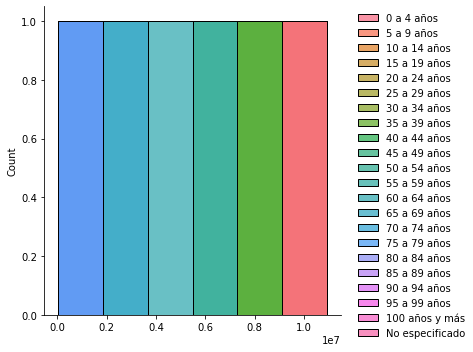

In [9]:
sns.displot(dfTest)

In [ ]:
#dfFinal.to_csv('../data/week3_5_analyzesStates.csv',index=False)